In [1]:
# Importing requried librarires :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset :

df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Number of rows and columns :

df.shape

(101766, 50)

# Dropping records for 'readmitted'= '>30'

#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
#dropping rows with NAs.
df.dropna(inplace=True)

In [5]:
#removing readmitted'= '>30' entries for df
df=df[df['readmitted']!='>30']

# dropping rows with NAs.
#df.dropna(inplace=True)

In [6]:
df.shape

(66221, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              66221 non-null  int64 
 1   patient_nbr               66221 non-null  int64 
 2   race                      66221 non-null  object
 3   gender                    66221 non-null  object
 4   age                       66221 non-null  object
 5   weight                    66221 non-null  object
 6   admission_type_id         66221 non-null  int64 
 7   discharge_disposition_id  66221 non-null  int64 
 8   admission_source_id       66221 non-null  int64 
 9   time_in_hospital          66221 non-null  int64 
 10  payer_code                66221 non-null  object
 11  medical_specialty         66221 non-null  object
 12  num_lab_procedures        66221 non-null  int64 
 13  num_procedures            66221 non-null  int64 
 14  num_medications      

In [8]:
#pd.options.display.max_colwidth = None   # to view all the data

#replacing 0 with np.nan for all columns accept 'outcome'

#df_ind=df[:]

df.iloc[:,:-1]=df.iloc[:,:-1].replace({0:np.nan})

# Missing value percentage calculation :

In [9]:
# checking missing value percentage:

percenatge = []
for i in df.columns:
    p = (df[df[i]=='?'].shape[0]/df.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing[df_missing['percentage of missing']>0]

,percentage of missing
weight,97.452470
medical_specialty,47.919844
payer_code,39.908790
race,2.620015
diag_3,1.638453
diag_2,0.428867
diag_1,0.025672


In [10]:
df1 = df.copy()

# Missing values imputation :

In [11]:
# 1). gender : Replacing 'Unknown/Invalid' with mode of gender, because only 3 values are missing/unkown :

df1.replace(['Unknown/Invalid'],df1['gender'].mode()[0],inplace=True)
df1['gender'].value_counts()

Female    35193
Male      31028
Name: gender, dtype: int64

In [12]:
# Replace '?' with 'NaN' :

df1.replace(['?'],np.nan,inplace=True)

In [13]:
# 2). race : we will include nan values in 'Other' , which is already present in it

df1['race']=df1['race'].fillna('Other')

In [14]:
df1['race'].value_counts()

Caucasian          48975
AfricanAmerican    12576
Other               2795
Hispanic            1395
Asian                480
Name: race, dtype: int64

In [15]:
# 3). diag_1 : 21 missing values (i,e ... 0.02%, so impute with mode)

df1['diag_1'] = df1['diag_1'].fillna('Other')

In [16]:
# 4). diag_2 : 0.35% of missing values, so impute with mode 
df1['diag_2'] = df1['diag_2'].fillna('Other')

In [17]:
# 5). diag_3 : 1.3% of missing values, so impute with mode 
df1['diag_3'] = df1['diag_3'].fillna('Other')

In [18]:
percenatge = []
for i in df1.columns:
    p = (df1[df1[i]=='?'].shape[0]/df1.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df1.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing.T

,encounter_id,troglitazone,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,...,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,readmitted
percentage of missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#dropping cols with high number of missing values
df1 = df1.drop(['payer_code','medical_specialty'],axis=1)

In [21]:
#Dropping admission_type_id', 'discharge_disposition_id', 'admission_source_id' :

df1=df1.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1) 

In [22]:
df1 = df1.drop(['weight', ],axis=1)

In [23]:
df1 = df1.drop(['encounter_id','patient_nbr'],axis=1)

In [24]:
df1.shape

(66221, 42)

# Converting Columns diag_1,diag_2,diag_3 to respective labels:

In [25]:
db1=df1.copy()

In [26]:
for i in db1['diag_1']:
    if i[:3]=='250':
        db1['diag_1'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_1'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_1'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_1'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_1'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_1'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_1'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5 :
        db1['diag_1'].replace({i:'Other'},inplace=True)

In [27]:
db1['diag_1'].value_counts()

Circulatory        19598
Neoplasms           9511
Respiratory         8891
Digestive           6111
Diabetes            5439
Other               5047
Injury              4737
Musculoskeletal     3486
Genitourinary       3401
Name: diag_1, dtype: int64

In [28]:
df1['diag_1']=db1['diag_1'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main df1

In [29]:
for i in db1['diag_2']:
    if i[:3]=='250':
        db1['diag_2'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_2'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_2'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_2'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_2'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_2'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_2'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_2'].replace({i:'Other'},inplace=True)

In [30]:
db1['diag_2'].value_counts()

Circulatory        20246
Neoplasms          12223
Diabetes            8597
Other               7277
Respiratory         6832
Genitourinary       5349
Digestive           2775
Injury              1753
Musculoskeletal     1169
Name: diag_2, dtype: int64

In [31]:
df1['diag_2']=db1['diag_2'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [32]:
for i in db1['diag_3']:
    if i[:3]=='250':
        db1['diag_3'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_3'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_3'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_3'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_3'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_3'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_3'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_3'].replace({i:'Other'},inplace=True)

In [33]:
db1['diag_3'].value_counts()

Circulatory        19312
Neoplasms          11844
Diabetes           11335
Other               9771
Respiratory         4627
Genitourinary       4178
Digestive           2512
Injury              1373
Musculoskeletal     1268
365.44                 1
Name: diag_3, dtype: int64

In [34]:
df1['diag_3']=db1['diag_3'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [35]:
df1.shape

(66221, 42)

In [36]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [37]:
#apart from metamorphin,insulin all medications should be merged

keys = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df1[colname] = df1[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df1['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df1['numchange'] = df1['numchange'] + df1[colname]
    del df1[colname]
    
df1['numchange'].value_counts()

0    63659
1     2506
2       55
3        1
Name: numchange, dtype: int64

In [38]:
len(keys)

19

In [39]:
#Dropping the medication cols that are merged.(19 columns)
df_merged=df1.drop(keys,axis=1)
df_merged.shape

(66221, 24)

In [40]:
df_merged.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'numchange'],
      dtype='object')

In [41]:
df_merged.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,max_glu_serum,A1Cresult,metformin,examide,citoglipton,insulin,change,diabetesMed,readmitted,numchange
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,None,None,No,No,No,No,No,No,NO,0
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,None,None,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,None,None,No,No,No,Up,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,None,None,No,No,No,Steady,Ch,Yes,NO,0
6,Caucasian,Male,[60-70),4,70,1,21,0,0,0,...,None,None,Steady,No,No,Steady,Ch,Yes,NO,0


In [42]:
#Col:'change': any change is there in medication or not
#Col:'numchange': number of medications that are changed

In [43]:
#Converting 'numchange' from int to object as it is categorical data:

df_merged['numchange']=df_merged['numchange'].astype('object')

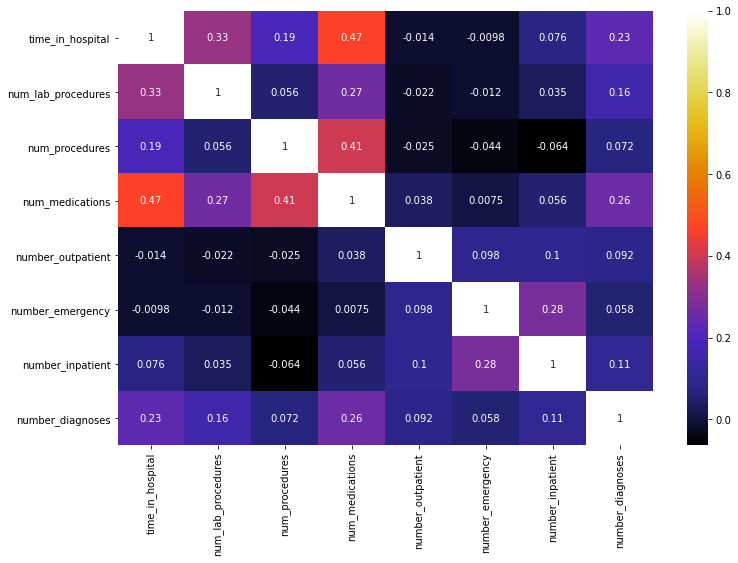

In [44]:
plt.figure(figsize = (12,8))
sns.heatmap(df_merged.corr(), annot =True, cmap='CMRmap')
plt.show()

In [45]:
# Numerical columns :

num_cols=['time_in_hospital','num_lab_procedures', 'num_procedures','num_medications',
          'number_outpatient','number_emergency','number_inpatient','number_diagnoses']


# Categorical columns :

cat_cols=['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum','A1Cresult', 'metformin',
          'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed', 'numchange']

In [46]:
df_merged.skew()

time_in_hospital       1.153950
num_lab_procedures    -0.209800
num_procedures         1.267481
num_medications        1.398140
number_outpatient      8.448639
number_emergency      20.935951
number_inpatient       4.193099
number_diagnoses      -0.774010
numchange              5.064812
dtype: float64

In [48]:
from scipy.stats import shapiro,ttest_ind,mannwhitneyu,chi2_contingency

In [49]:
p = []
features = []
for i in df_merged.describe(include = np.number).columns:
    stat,pvalue = shapiro(df_merged[i].values)
    p.append(pvalue)
    features.append(i)
pd.DataFrame(p,columns=['p_value'],index=features)

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,p_value
time_in_hospital,0.0
num_lab_procedures,0.0
num_procedures,0.0
num_medications,0.0
number_outpatient,0.0
number_emergency,0.0
number_inpatient,0.0
number_diagnoses,0.0


In [50]:
dt  = df_merged.sample(5000, random_state= 0)
p = []
features = []
for i in dt.describe(include = np.number).columns:
    stat,pvalue = shapiro(dt[i].values)
    p.append(pvalue)
    features.append(i)
pd.DataFrame(p,columns=['p_value'],index=features)

,p_value
time_in_hospital,0.000000e+00
num_lab_procedures,3.661298e-21
num_procedures,0.000000e+00
num_medications,0.000000e+00
number_outpatient,0.000000e+00
number_emergency,0.000000e+00
number_inpatient,0.000000e+00
number_diagnoses,0.000000e+00


In [51]:
l1 = []

for i in df_merged.describe(include = np.number).columns:
    df_NO=df_merged[df_merged['readmitted']=='NO'][i]
    df_L=df_merged[df_merged['readmitted']=='<30'][i]
    l1.append(mannwhitneyu(df_NO.values,df_L.values).pvalue)
    

d_1=pd.DataFrame(l1, index = df_merged.describe(include = np.number).columns, columns = ['P-value with readmission'])

print(d_1.shape)

(8, 1)


In [52]:
d_1

,P-value with readmission
time_in_hospital,7.607614e-84
num_lab_procedures,5.718669e-21
num_procedures,1.962113e-09
num_medications,1.822846e-77
number_outpatient,1.794262e-95
number_emergency,7.779246e-216
number_inpatient,0.000000e+00
number_diagnoses,1.979743e-112


In [53]:
l1 = []


for i in df_merged.describe(include = np.object).columns:
    c=chi2_contingency(pd.crosstab(df_merged[i],df_merged['readmitted']).values)
    l1.append(c[1])

d_1=pd.DataFrame(l1, index = df_merged.describe(include = np.object).columns, columns = ['P-value with readmission'])

In [54]:
d_1

,P-value with readmission
race,7.983005e-14
gender,1.669633e-02
age,1.792637e-29
diag_1,7.811026e-24
diag_2,9.988616e-11
diag_3,1.686827e-18
max_glu_serum,7.855814e-07
A1Cresult,1.908681e-10
metformin,1.151462e-17
examide,1.000000e+00
